nodes: 71723
edges: 124528


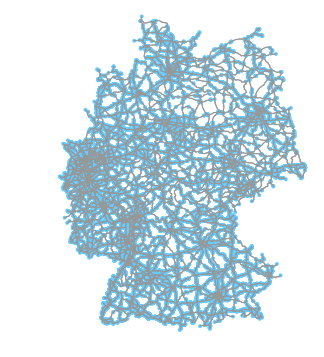

In [9]:
#prim network

nodes: 157271
edges: 229666


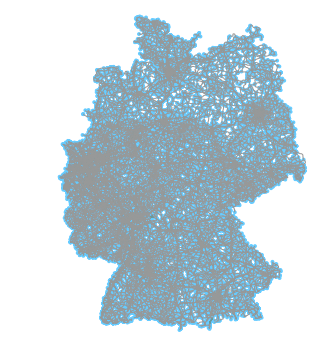

In [4]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString, Point


graph1 =ox.load_graphml( filename="allGermany_allstreetsUntilSec_proj.graphml")
graph =graph1.to_undirected()

print ("nodes: " + str(len(graph.nodes(data=True))))
print ("edges: " + str(len(graph.edges(data=True))))
fig, ax = ox.plot_graph(graph)

In [13]:
#ox.save_graphml(graph, filename="allGermany_allstreetsUntilPrim_proj_connected_undirected.graphml")

In [5]:
nodes_1, edges_1 = ox.graph_to_gdfs(graph, nodes=True, edges=True)
edges_1.head()

,access,area,bridge,est_width,geometry,highway,id,junction,key,landuse,...,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,yes,NaN,LINESTRING (351586.3080871678 5691746.57917163...,motorway_link,0,NaN,0,NaN,...,NaN,NaN,True,"[321450867, 24615756, 24615790]",NaN,NaN,NaN,52690944,327273674,NaN
1,NaN,NaN,NaN,NaN,LINESTRING (351586.3080871678 5691746.57917163...,motorway_link,0,NaN,0,NaN,...,NaN,NaN,True,6273862,NaN,NaN,NaN,52690944,899088653,NaN
2,NaN,NaN,yes,NaN,LINESTRING (351724.253630074 5691837.699355782...,motorway_link,0,NaN,0,NaN,...,NaN,NaN,True,"[147476776, 4298329, 147476771]",NaN,NaN,NaN,52690944,1604129763,NaN
3,NaN,NaN,NaN,NaN,LINESTRING (411445.4129331233 5319032.20763055...,trunk,0,NaN,0,NaN,...,80,Paduaallee,True,"[237884449, 237860090, 237884451]",NaN,NaN,NaN,150994944,25180712,NaN
4,NaN,NaN,yes,NaN,LINESTRING (411805.6286332309 5319426.83547224...,trunk,0,NaN,0,NaN,...,80,"[Paduaallee, Granadaallee]",True,"[4549145, 27361986, 30277843]",NaN,NaN,NaN,150994944,300395130,NaN


In [6]:
list(edges_1.columns)

['access',
 'area',
 'bridge',
 'est_width',
 'geometry',
 'highway',
 'id',
 'junction',
 'key',
 'landuse',
 'lanes',
 'length',
 'maxspeed',
 'name',
 'oneway',
 'osmid',
 'ref',
 'service',
 'tunnel',
 'u',
 'v',
 'width']

In [31]:
# #if length is not in list then
# edges_1['length']= (edges_1.geometry.length)
# edges_1.head()

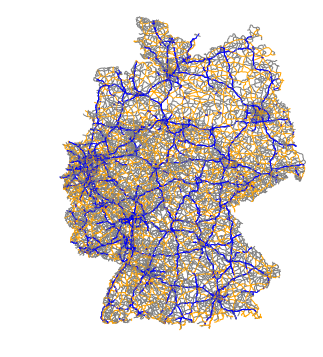

In [8]:
# create empty list for node colors
edge_color = []

# for each node in the graph
for edge in graph.edges(data=True):

    # if the node has the attribute group1 highway
    if 'primary' in edge[2]['highway']:
        edge_color.append('orange')
    elif 'motorway' in edge[2]['highway']:
        edge_color.append('blue')
    elif 'trunk' in edge[2]['highway']:
        edge_color.append('blue')
    elif 'secondary' in edge[2]['highway']:
        edge_color.append('grey')
    else:
        edge_color.append('grey')  
    
fig, ax = ox.plot_graph(graph,  edge_color=edge_color, node_color='none')

In [9]:
keys = {}

for edge in (graph.edges(data=True)):

    attrs = {}
    if edge[2]['highway']=='motorway':
        attrs['weight']= edge[2]['length']*1
    elif edge[2]['highway']=='primary':
        attrs['weight']= edge[2]['length']*1.5
    elif edge[2]['highway']=='secondary':
        attrs['weight']= edge[2]['length']*1.8
    else:
        attrs['weight']= edge[2]['length']*3

    keyy=(edge[0], edge[1], 0)
    keys[keyy] = attrs

nx.set_edge_attributes(graph, keys)

nodes_1, edges_1 = ox.graph_to_gdfs(graph, nodes=True, edges=True)
edges_1.head()

,access,area,bridge,est_width,geometry,highway,id,junction,key,landuse,...,name,oneway,osmid,ref,service,tunnel,u,v,weight,width
0,NaN,NaN,yes,NaN,LINESTRING (351586.3080871678 5691746.57917163...,motorway_link,0,NaN,0,NaN,...,NaN,True,"[321450867, 24615756, 24615790]",NaN,NaN,NaN,52690944,327273674,1817.540575,NaN
1,NaN,NaN,NaN,NaN,LINESTRING (351586.3080871678 5691746.57917163...,motorway_link,0,NaN,0,NaN,...,NaN,True,6273862,NaN,NaN,NaN,52690944,899088653,1100.692968,NaN
2,NaN,NaN,yes,NaN,LINESTRING (351724.253630074 5691837.699355782...,motorway_link,0,NaN,0,NaN,...,NaN,True,"[147476776, 4298329, 147476771]",NaN,NaN,NaN,52690944,1604129763,495.297920,NaN
3,NaN,NaN,NaN,NaN,LINESTRING (411445.4129331233 5319032.20763055...,trunk,0,NaN,0,NaN,...,Paduaallee,True,"[237884449, 237860090, 237884451]",NaN,NaN,NaN,150994944,25180712,1318.280545,NaN
4,NaN,NaN,yes,NaN,LINESTRING (411805.6286332309 5319426.83547224...,trunk,0,NaN,0,NaN,...,"[Paduaallee, Granadaallee]",True,"[4549145, 27361986, 30277843]",NaN,NaN,NaN,150994944,300395130,1602.311640,NaN


Highway part length: 
motorway: 411 km
trunk:    8 km
primary:  122 km
secondary:  43 km
 
Route length: 586 km


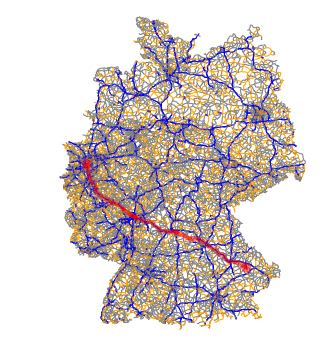

In [18]:
from pandas import *

origin_node = list(graph.nodes())[0]
destination_node = list(graph.nodes())[-10000]


route = nx.shortest_path(graph, origin_node, destination_node, weight='length')
     
if len(route)>1: 
    length = 0
    motorway_length = 0
    trunk_length = 0
    primary_length = 0
    secondary_length = 0
    #iterate over every single edge along the path
    for i in range(len(route)-1):
        edgeData= graph.get_edge_data(route[i],route[i+1])
        length = length + edgeData[0].get('length')
        if edgeData[0].get('highway') in ('motorway','motorway_link') :
            motorway_length = motorway_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
            trunk_length = trunk_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('primary', 'primary_link'):
            primary_length = primary_length + edgeData[0].get('length') 
        elif edgeData[0].get('highway') in ('secondary', 'secondary_link'):
            secondary_length = secondary_length + edgeData[0].get('length') 
            
#print (length_raw)
print ("Highway part length: ")
print ("motorway: " + str(int(round(motorway_length/1000))) + " km")
print ("trunk:    " + str(int(round(trunk_length/1000))) + " km")
print ("primary:  " + str(int(round(primary_length/1000))) + " km")
print ("secondary:  " + str(int(round(secondary_length/1000))) + " km")
print (" ")
print ("Route length: " + str(int(round(length/1000))) + " km")


fig, ax = ox.plot_graph_route(graph, route=route,  edge_color=edge_color, node_color='none')

Highway part length: 
motorway: 580 km
trunk:    1 km
primary:  0 km
secondary:  16 km
 
Route length: 597 km


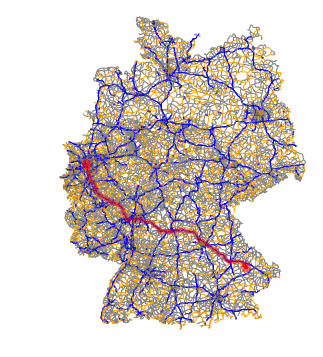

In [19]:
from pandas import *

origin_node = list(graph.nodes())[0]
destination_node = list(graph.nodes())[-10000]


route = nx.shortest_path(graph, origin_node, destination_node, weight='weight')
     
if len(route)>1: 
    length = 0
    motorway_length = 0
    trunk_length = 0
    primary_length = 0
    secondary_length = 0
    #iterate over every single edge along the path
    for i in range(len(route)-1):
        edgeData= graph.get_edge_data(route[i],route[i+1])
        length = length + edgeData[0].get('length')
        if edgeData[0].get('highway') in ('motorway','motorway_link') :
            motorway_length = motorway_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
            trunk_length = trunk_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('primary', 'primary_link'):
            primary_length = primary_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('secondary', 'secondary_link'):
            secondary_length = secondary_length + edgeData[0].get('length') 

#print (length_raw)
print ("Highway part length: ")
print ("motorway: " + str(int(round(motorway_length/1000))) + " km")
print ("trunk:    " + str(int(round(trunk_length/1000))) + " km")
print ("primary:  " + str(int(round(primary_length/1000))) + " km")
print ("secondary:  " + str(int(round(secondary_length/1000))) + " km")
print (" ")
print ("Route length: " + str(int(round(length/1000))) + " km")


fig, ax = ox.plot_graph_route(graph, route=route,  edge_color=edge_color, node_color='none')

In [290]:
#calculate route length by EDGES
# fast access to edge-data

import csv

# origin_node = list(graph1.nodes())[-100]

with open('route_length_germany-sec_real_linkdata.csv','a', newline='') as newFile:
    newFileWriter = csv.writer(newFile)
    newFileWriter.writerow(['origin_id','destination_id','distance','motorway_distance','trunk_distance','primary_distance','secondary_distance'])
    
    #define origin
    for i in range(100):
        
        origin_node = list(graph1.nodes())[i]
        #get the routes
        routes_dij = nx.single_source_dijkstra_path(graph1_proj, origin_node, weight='weight')
        
        #iterate over all the routes that start at origin_node
        for route in list(routes_dij.items()):
            #to make sure it is a route       
            if len(route[1])>1: 
                length = 0
                motorway_length = 0
                trunk_length = 0
                primary_length = 0
                secondary_length = 0
                #iterate over every single edge along the path
                for i in range(len(route[1])-1):
                    edgeData= graph1_proj.get_edge_data(route[1][i],route[1][i+1])
                    length = length + edgeData[0].get('length')
                    if edgeData[0].get('highway') in ('motorway','motorway_link') :
                        motorway_length = motorway_length + edgeData[0].get('length')
                    elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
                        trunk_length = trunk_length + edgeData[0].get('length')
                    elif edgeData[0].get('highway') in ('primary', 'primary_link'):
                        primary_length = primary_length + edgeData[0].get('length')
                    elif edgeData[0].get('highway') in ('secondary', 'secondary_link'):
                        secondary_length = secondary_length + edgeData[0].get('length') 
                newFileWriter.writerow([origin_node, route[0], int(round(length/1000)), int(round(motorway_length/1000)), int(round(trunk_length/1000)), int(round(primary_length/1000)), int(round(secondary_length/1000))])
#                print ('route_length is '+ str( length)+ ' from ' +str(origin_node)+ ' to ' + str(route[0])+  ' and motorway: ' +str(motorway_length) )
                
                

In [23]:
plz_df= pd.read_csv('C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/plz_centroide_utm32_nearest_graph-sec_node.csv')
print (plz_df)

                  X             Y  V_LFD  V_DAT    PLZ  \
0     830542.273549  5.667133e+06     33   1214   1067   
1     832010.317324  5.664958e+06     33   1214   1069   
2     832134.898562  5.668003e+06     33   1214   1097   
3     837556.987061  5.671025e+06     33   1214   1099   
4     834629.417826  5.677657e+06     33   1214   1108   
5     832817.347625  5.673843e+06     33   1214   1109   
6     831371.244492  5.669513e+06     33   1214   1127   
7     830255.782419  5.671207e+06     33   1214   1129   
8     828349.888260  5.669265e+06     33   1214   1139   
9     823688.038027  5.667366e+06     33   1214   1156   
10    826992.619080  5.667341e+06     33   1214   1157   
11    829275.763992  5.665172e+06     33   1214   1159   
12    826971.852149  5.664777e+06     33   1214   1169   
13    829410.126957  5.663324e+06     33   1214   1187   
14    829709.576323  5.661908e+06     33   1214   1189   
15    832578.832957  5.662415e+06     33   1214   1217   
16    834139.5

In [37]:
import datetime
import sys
import csv
from shapely.geometry import LineString, Point

start_time= datetime.datetime.now()

#get the OSM nodeID from the motorway junctions
#plz_list = plz_df['nearest_graph_node'][:10].tolist()
plz_list = plz_df['nearest_graph_node'].tolist()

plz_list = list(map(int, plz_list))

print (len(plz_list))
start_list = plz_list
dest_list = plz_list

count=0


# #gets name for nodeid
# def getJuncName(nodeid):
#     name = "'" + str(namedict.get(nodeid)) +"'"
#     return name

#get nearest node, if actual node is not in the graph
def getNearestNode(nodeid):
    coord_x = plz_df.loc[plz_df['nearest_graph_node']==str(nodeid) ]['X'].item()
    coord_y = plz_df.loc[plz_df['nearest_graph_node']==str(nodeid) ]['Y'].item()
    coords = (coord_x, coord_y)
    nearest_node = ox.get_nearest_node(graph, coords, method='euclidean')
    return nearest_node

#progressbar
def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))
    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)
    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
sys.stdout.flush()


# #create datafrmes to store stuff
# df_raw = pd.DataFrame(columns=['Origin', 'Destination'])
# output_DF = pd.DataFrame(columns=['origin_plz_name', 'origin_plz', 'origin_id','origin_name','destination_id','destination_name','distance'])

with open('route_length_plz2plz_germany-sec_'+ str(len(start_list)) + '.csv','a', newline='') as newFile:
    newFileWriter = csv.writer(newFile)
    newFileWriter.writerow(['origin_id','destination_id','distance','motorway_distance','trunk_distance','primary_distance','secondary_distance'])

    #start to iterate over the nodeslist
    for start in start_list:
        count=count+1
        progress(count, len(start_list), status='')
        #catch if startnode not in network
        try: 
            #calculate the route from the OSM node to all nodes in the network
            routes_dij = nx.single_source_dijkstra_path(G=graph, source=start,weight='weight')
        except:
            print ('')
            print("Start node " + str(start) +" not found")
            nearest_node = getNearestNode(start)
            print("Using nearest node instead, nodeid: " + str(nearest_node))
            routes_dij = nx.single_source_dijkstra_path(G=graph, source=nearest_node,weight='weight')
    
        for route in list(routes_dij.items()):
            if route[0] in dest_list:
                #to make sure it is a route       
                if len(route[1])>1: 
                    length = 0
                    motorway_length = 0
                    trunk_length = 0
                    primary_length = 0
                    secondary_length = 0
                    #iterate over every single edge along the path
                    for i in range(len(route[1])-1):
                        edgeData= graph.get_edge_data(route[1][i],route[1][i+1])
                        length = length + edgeData[0].get('length')
                        if edgeData[0].get('highway') in ('motorway','motorway_link') :
                            motorway_length = motorway_length + edgeData[0].get('length')
                        elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
                            trunk_length = trunk_length + edgeData[0].get('length')
                        elif edgeData[0].get('highway') in ('primary', 'primary_link'):
                            primary_length = primary_length + edgeData[0].get('length')
                        elif edgeData[0].get('highway') in ('secondary', 'secondary_link'):
                            secondary_length = secondary_length + edgeData[0].get('length') 
                    newFileWriter.writerow([origin_node, route[0], int(round(length/1000)), int(round(motorway_length/1000)), int(round(trunk_length/1000)), int(round(primary_length/1000)), int(round(secondary_length/1000))])

    #keep track of performance    
    end_time= datetime.datetime.now()
    delta_time = int((end_time-start_time).total_seconds())
    print ('')
    print ('origins: ' + str(len(start_list)))
    print ('time:    ' + str(delta_time))
    print ('origins per sec: ' + str(delta_time/len(start_list)))
    print ('rel:     '+ str((len(start_list)*(len(start_list)))))
    print ('rel per sec: ' + str(delta_time/(len(start_list)*(len(start_list)))))
    
    
output_df= pd.read_csv('C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/route_length_plz2plz_germany-sec_'+ str(len(start_list)) + '.csv')
print ('actual number of rel: '+ str(len(output_df)))

8207
[============================================================] 100.0% ...
origins: 8207
time:    209046
origins per sec: 25.471670525161446
rel:     67354849
rel per sec: 0.003103651824681546
actual number of rel: 64113084


In [32]:
output_df= pd.read_csv('C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/route_length_plz2plz_germany-sec_'+ str(len(start_list)) + '.csv')
print ('actual number of rel: '+ str(len(output_df)))

actual number of rel: 9600


In [38]:
#compress output csv
import gzip
import shutil
path= 'C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/route_length_plz2plz_germany-sec_'+ str(len(start_list)) + '.csv'
with open(path, 'rb') as f_in:
    with gzip.open(path + '.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [39]:
print (output_df)

          origin_id  destination_id  distance  motorway_distance  \
0          52690944       903673001         4                  0   
1          52690944         3411658         3                  0   
2          52690944        21596886         3                  0   
3          52690944          536675         4                  0   
4          52690944      3020440809         4                  0   
5          52690944       151013228         4                  0   
6          52690944       335688683         7                  0   
7          52690944        30056676         5                  0   
8          52690944       940312673         4                  0   
9          52690944        11005259         6                  0   
10         52690944        26384674         6                  0   
11         52690944      3907571845         7                  0   
12         52690944        10919767         7                  0   
13         52690944       784730663         6   